# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326229 entries, 0 to 2326228
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21070
Address                             12
Zip Code                         14387
Council District                 47535
APD Sector                        9150
APD District                      9633
PRA                              10917
Census Tract                    571456
Clearance Status                609220
Clearance Date                  340025
UCR Category                   1531645
Category Description           1531645
X-coordinate                     10320
Y-coordinate                     10320
Latitude                         39360
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2326224,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240.0,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2326225,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221.0,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2326226,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293.0,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2326227,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325.0,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2326228,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382.0,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

836

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325393 entries, 2003-01-01 to 2021-04-17
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21059
address                            12
zip_code                        14382
council_district                47517
apd_sector                       9146
apd_district                     9629
clearance_status               608984
clearance_date                 339864
latitude                        39332
longitude                       39332
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,THEFT,N,2003-01-02 15:03:00,DRUG STORE / DR. OFFICE / HOSPITAL,601 E 15TH ST,78701.0,1.0,BA,1,O,2003-04-14,30.275027,-97.733789,2003,1,1,1
2003-01-01,HARASSMENT,N,2003-01-03 16:12:00,RESIDENCE / HOME,608 KINNEY AVE,78704.0,5.0,DA,1,N,NaT,30.260687,-97.763218,2003,1,1,1
2003-01-01,FAMILY DISTURBANCE,N,2003-01-01 16:17:00,COMMERCIAL / OFFICE BUILDING,2121 E OLTORF ST,78741.0,3.0,HE,2,N,NaT,30.230153,-97.732583,2003,1,1,1
2003-01-01,AGG ASSAULT,N,2003-01-01 01:50:00,STREETS / HWY / ROAD / ALLEY,100 W 5TH ST,78701.0,9.0,GE,1,O,2003-01-02,30.267219,-97.743282,2003,1,1,1
2003-01-01,INDECENCY WITH A CHILD/CONTACT,N,2003-04-17 09:58:00,RESIDENCE / HOME,8400 BLOCK SPRINGDALE RD,78724.0,1.0,CH,7,N,2003-12-23,NaN,NaN,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-04-17,BURGLARY NON RESIDENCE,N,2021-04-17 13:37:00,COMMERCIAL / OFFICE BUILDING,8776 RESEARCH BLVD SVRD SB,78757.0,7.0,ID,7,NaN,NaT,30.365864,-97.719900,2021,4,15,17
2021-04-17,FAMILY DISTURBANCE,N,2021-04-17 23:22:00,RESIDENCE / HOME,3401 W PARMER LN,78727.0,7.0,AD,3,NaN,NaT,30.420921,-97.709676,2021,4,15,17
2021-04-17,PURSE SNATCHING,N,2021-04-17 15:08:00,DEPARTMENT / DISCOUNT STORE,1030 NORWOOD PARK BLVD,78753.0,4.0,ID,2,NaN,NaT,30.339153,-97.691169,2021,4,15,17
2021-04-17,RUNAWAY CHILD,N,2021-04-17 23:04:00,RESIDENCE / HOME,8217 SAM RAYBURN DR,78753.0,4.0,ED,1,NaN,NaT,30.347187,-97.699102,2021,4,15,17
2021-04-17,CRIMINAL TRESPASS/HOTEL,N,2021-04-17 13:38:00,HOTEL / MOTEL / ETC.,3105 N IH 35 SVRD NB,78722.0,9.0,CH,3,NaN,NaT,30.288762,-97.722776,2021,4,15,17


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    208463
78753.0    180768
78701.0    169610
78758.0    161215
78704.0    156154
78745.0    152305
78702.0    137674
78744.0    127504
78723.0    119591
78752.0     85266
78748.0     68955
78759.0     67169
78751.0     64770
78757.0     58603
78705.0     57716
78721.0     48124
78749.0     40838
78724.0     38017
78727.0     36306
78703.0     35595
78731.0     29034
78746.0     28361
78729.0     25680
78750.0     24056
78754.0     23238
Name: zip_code, dtype: int64

78741.0    0.090204
78753.0    0.078220
78701.0    0.073392
78758.0    0.069760
78704.0    0.067570
78745.0    0.065904
78702.0    0.059573
78744.0    0.055172
78723.0    0.051748
78752.0    0.036896
78748.0    0.029838
78759.0    0.029065
78751.0    0.028027
78757.0    0.025358
78705.0    0.024974
78721.0    0.020824
78749.0    0.017671
78724.0    0.016450
78727.0    0.015710
78703.0    0.015402
78731.0    0.012563
78746.0    0.012272
78729.0    0.011112
78750.0    0.010409
78754.0    0.010055
Name: zip_code, dtype: float64

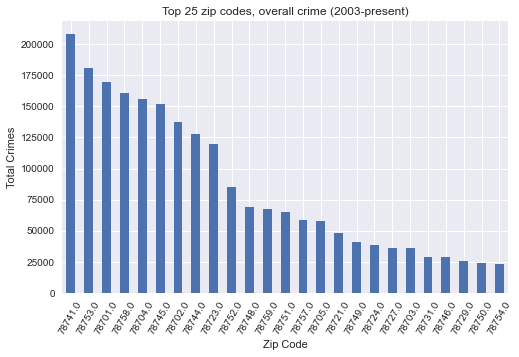

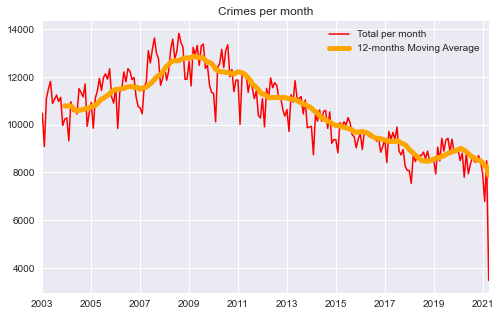

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               232079
THEFT                             213077
FAMILY DISTURBANCE                181656
CRIMINAL MISCHIEF                 128550
ASSAULT W/INJURY-FAM/DATE VIOL     78715
BURGLARY OF RESIDENCE              77446
DWI                                69995
PUBLIC INTOXICATION                68927
HARASSMENT                         64783
DISTURBANCE - OTHER                62126
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,HARASSMENT,FAMILY DISTURBANCE,PUBLIC INTOXICATION,CRIMINAL MISCHIEF,DWI,ASSAULT W/INJURY-FAM/DATE VIOL,BURGLARY OF RESIDENCE,TOTAL
occurred_date,,,,,,,,,
2020-12-31,409,252,825,50,478,165,253,187,2619
2021-01-31,361,253,815,55,432,168,256,127,2467
2021-02-28,310,166,811,62,338,130,245,116,2178
2021-03-31,433,192,876,75,427,179,256,156,2594
2021-04-30,175,67,278,32,162,67,137,49,967


<Figure size 432x288 with 0 Axes>

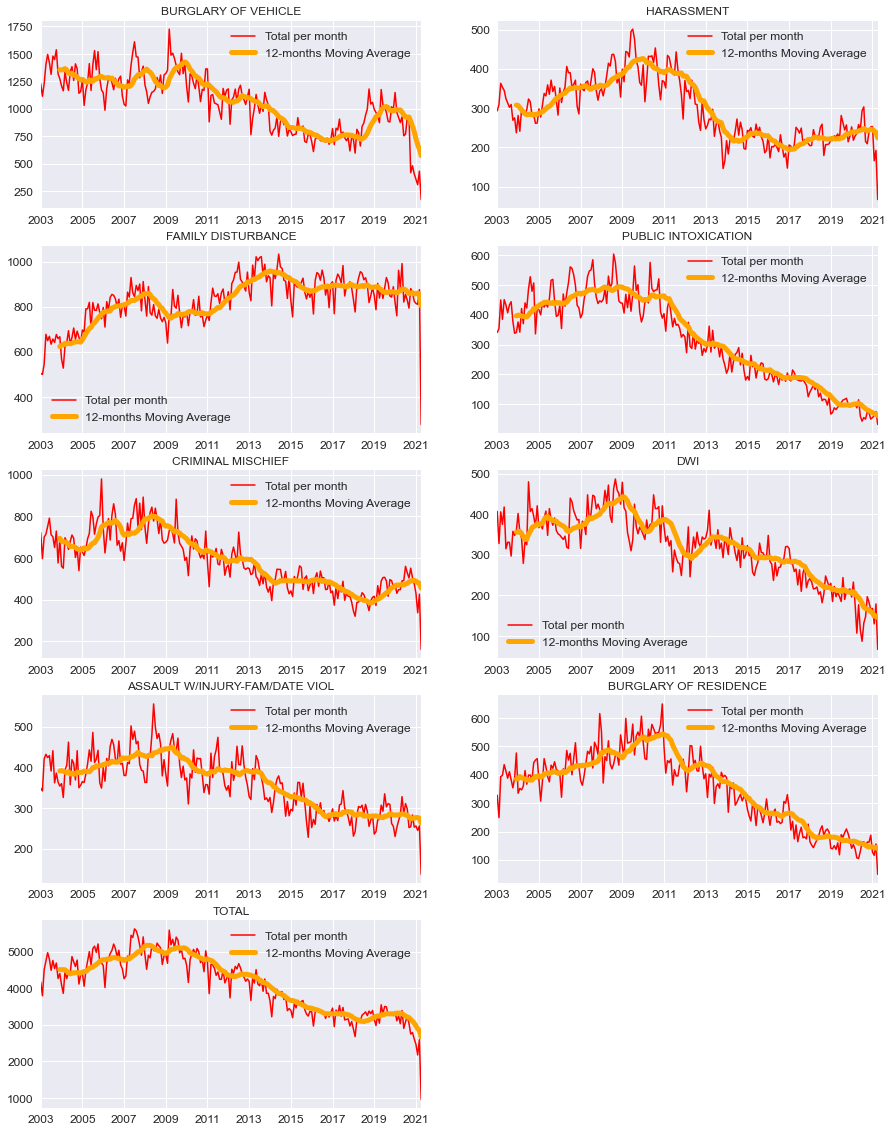

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17189
THEFT                             15880
BURGLARY OF VEHICLE                9313
WARRANT ARREST NON TRAFFIC         8967
DWI                                8351
ASSAULT WITH INJURY                7596
VIOL CITY ORDINANCE - OTHER        6191
POSS OF DRUG PARAPHERNALIA         6071
CRIMINAL MISCHIEF                  5883
CRIMINAL TRESPASS                  3942
POSSESSION OF MARIJUANA            3402
DISTURBANCE - OTHER                3380
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2920
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2610
CRIMINAL TRESPASS/TRANSIENT        2592
THEFT OF BICYCLE                   2530
URINATING IN PUBLIC PLACE          2337
FAMILY DISTURBANCE                 2199
DOC FIGHTING                       2132
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1743
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101344
THEFT                             0.093627
BURGLARY OF VEHICLE               0.054908
WARRANT ARREST NON TRAFFIC        0.052868
DWI                               0.049236
ASSAULT WITH INJURY               0.044785
VIOL CITY ORDINANCE - OTHER       0.036501
POSS OF DRUG PARAPHERNALIA        0.035794
CRIMINAL MISCHIEF                 0.034685
CRIMINAL TRESPASS                 0.023242
POSSESSION OF MARIJUANA           0.020058
DISTURBANCE - OTHER               0.019928
CUSTODY ARREST TRAFFIC WARR       0.017646
POSS CONTROLLED SUB/NARCOTIC      0.017216
CAMPING IN PARK                   0.016420
VOCO - ALCOHOL  CONSUMPTION       0.015860
ASSAULT BY CONTACT                0.015388
CRIMINAL TRESPASS/TRANSIENT       0.015282
THEFT OF BICYCLE                  0.014917
URINATING IN PUBLIC PLACE         0.013779
FAMILY DISTURBANCE                0.012965
DOC FIGHTING                      0.012570
PROTECTIVE ORDER                  0.012375
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

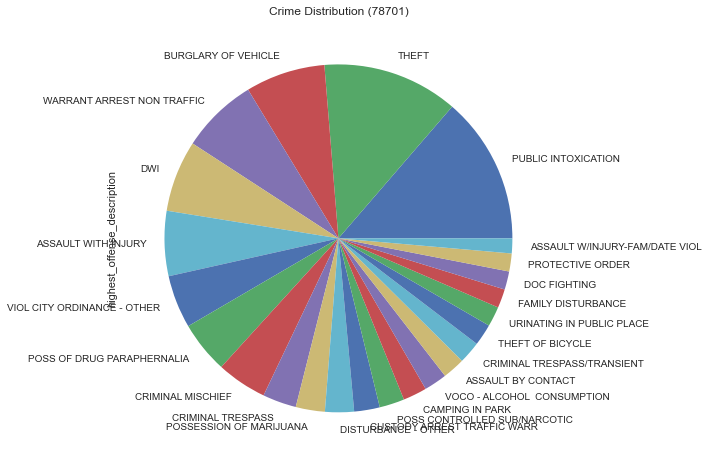

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17245
BURGLARY OF VEHICLE               16008
FAMILY DISTURBANCE                14821
CRIMINAL MISCHIEF                  9536
THEFT BY SHOPLIFTING               7687
ASSAULT W/INJURY-FAM/DATE VIOL     7235
BURGLARY OF RESIDENCE              6098
DWI                                5061
DISTURBANCE - OTHER                4811
CUSTODY ARREST TRAFFIC WARR        4347
HARASSMENT                         4287
AUTO THEFT                         4285
POSS OF DRUG PARAPHERNALIA         3735
PUBLIC INTOXICATION                3376
ASSAULT WITH INJURY                3356
CRIMINAL TRESPASS                  3171
POSS CONTROLLED SUB/NARCOTIC       3000
RUNAWAY CHILD                      2955
WARRANT ARREST NON TRAFFIC         2797
POSSESSION OF MARIJUANA            2714
BURGLARY NON RESIDENCE             2509
VIOL CITY ORDINANCE - OTHER        1870
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

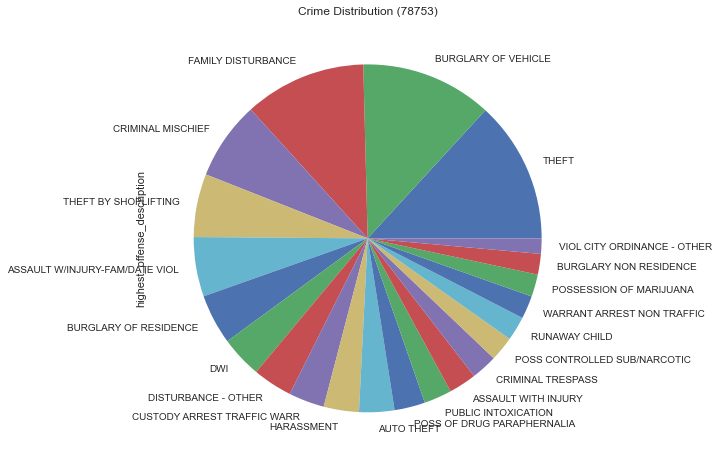

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20543
BURGLARY OF VEHICLE               19883
THEFT                             15685
CRIMINAL MISCHIEF                 11114
ASSAULT W/INJURY-FAM/DATE VIOL     9681
BURGLARY OF RESIDENCE              8911
PUBLIC INTOXICATION                6396
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5693
HARASSMENT                         5566
DISTURBANCE - OTHER                5201
AUTO THEFT                         4695
ASSAULT WITH INJURY                4568
CRIMINAL TRESPASS                  3955
POSS CONTROLLED SUB/NARCOTIC       3893
POSSESSION OF MARIJUANA            3801
THEFT BY SHOPLIFTING               3591
POSS OF DRUG PARAPHERNALIA         3548
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2801
VIOL CITY ORDINANCE - OTHER        2197
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098545
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

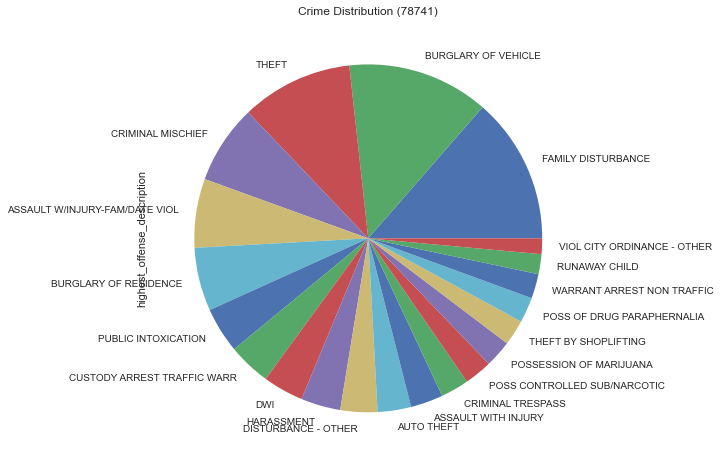

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15111
BURGLARY OF VEHICLE               14786
THEFT                             13640
CRIMINAL MISCHIEF                  8581
BURGLARY OF RESIDENCE              5879
ASSAULT W/INJURY-FAM/DATE VIOL     5787
HARASSMENT                         5175
DISTURBANCE - OTHER                4560
DWI                                4439
PUBLIC INTOXICATION                4009
CUSTODY ARREST TRAFFIC WARR        3248
AUTO THEFT                         2891
BURGLARY NON RESIDENCE             2888
ASSAULT WITH INJURY                2706
RUNAWAY CHILD                      2615
POSSESSION OF MARIJUANA            2594
WARRANT ARREST NON TRAFFIC         2109
POSS CONTROLLED SUB/NARCOTIC       2050
THEFT BY SHOPLIFTING               2009
CRIMINAL TRESPASS                  1969
IDENTITY THEFT                     1655
POSS OF DRUG PARAPHERNALIA         1527
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

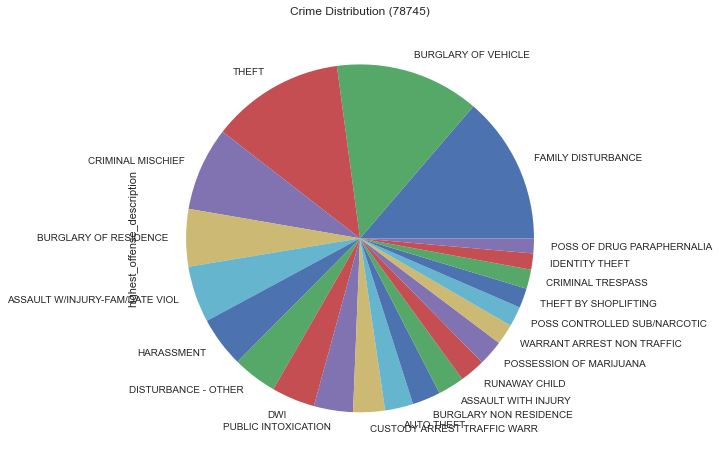

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8679
THEFT                             5649
CRIMINAL MISCHIEF                 4995
THEFT OF BICYCLE                  3512
PUBLIC INTOXICATION               2632
BURGLARY OF RESIDENCE             2129
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1362
AUTO THEFT                        1351
ASSAULT WITH INJURY               1267
HARASSMENT                        1225
DWI                               1220
FAMILY DISTURBANCE                1215
DISTURBANCE - OTHER               1127
BURGLARY NON RESIDENCE             887
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        792
GRAFFITI                           785
CUSTODY ARREST TRAFFIC WARR        782
ASSAULT W/INJURY-FAM/DATE VIOL     703
POSSESSION OF MARIJUANA            662
ASSAULT BY CONTACT                 625
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150374
THEFT                             0.097876
CRIMINAL MISCHIEF                 0.086544
THEFT OF BICYCLE                  0.060850
PUBLIC INTOXICATION               0.045603
BURGLARY OF RESIDENCE             0.036888
WARRANT ARREST NON TRAFFIC        0.026856
CRIMINAL TRESPASS                 0.023598
AUTO THEFT                        0.023408
ASSAULT WITH INJURY               0.021952
HARASSMENT                        0.021225
DWI                               0.021138
FAMILY DISTURBANCE                0.021051
DISTURBANCE - OTHER               0.019527
BURGLARY NON RESIDENCE            0.015368
CRIMINAL TRESPASS/TRANSIENT       0.015039
VIOL CITY ORDINANCE - OTHER       0.013722
GRAFFITI                          0.013601
CUSTODY ARREST TRAFFIC WARR       0.013549
ASSAULT W/INJURY-FAM/DATE VIOL    0.012180
POSSESSION OF MARIJUANA           0.011470
ASSAULT BY CONTACT                0.010829
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

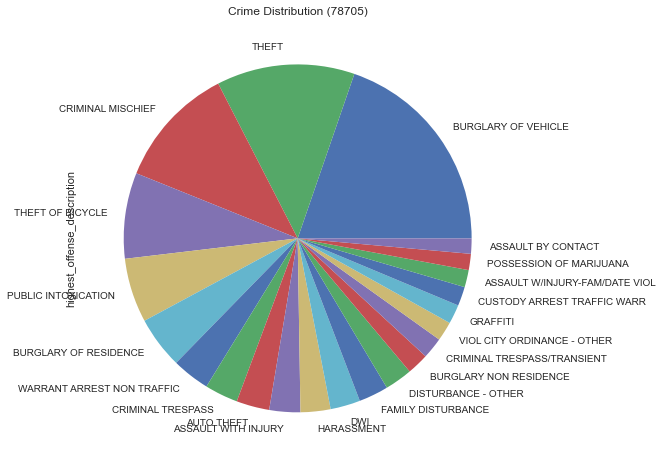

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5418
THEFT                             5102
THEFT BY SHOPLIFTING              2554
CRIMINAL MISCHIEF                 1276
DWI                                882
FAMILY DISTURBANCE                 768
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         633
AUTO THEFT                         610
BURGLARY OF RESIDENCE              522
THEFT FROM PERSON                  462
IDENTITY THEFT                     449
DISTURBANCE - OTHER                436
BURGLARY NON RESIDENCE             359
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            328
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      282
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                199
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191037
THEFT                             0.179895
THEFT BY SHOPLIFTING              0.090053
CRIMINAL MISCHIEF                 0.044991
DWI                               0.031099
FAMILY DISTURBANCE                0.027079
VIOL CITY ORDINANCE - OTHER       0.022989
HARASSMENT                        0.022319
AUTO THEFT                        0.021508
BURGLARY OF RESIDENCE             0.018406
THEFT FROM PERSON                 0.016290
IDENTITY THEFT                    0.015832
DISTURBANCE - OTHER               0.015373
BURGLARY NON RESIDENCE            0.012658
ASSAULT W/INJURY-FAM/DATE VIOL    0.011988
CRED CARD ABUSE - OTHER           0.011565
PUBLIC INTOXICATION               0.011318
POSSESSION OF MARIJUANA           0.010472
FRAUD - OTHER                     0.009943
SUSPICIOUS PERSON                 0.009132
CUSTODY ARREST TRAFFIC WARR       0.008709
WARRANT ARREST NON TRAFFIC        0.007863
ASSAULT WITH INJURY               0.007017
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

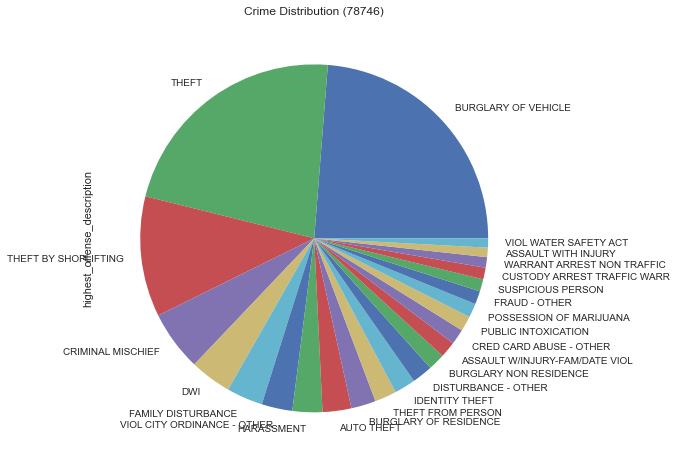

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130587
78753.0    0.099262
78758.0    0.094513
78701.0    0.074876
78723.0    0.074337
78702.0    0.073967
78745.0    0.057766
78752.0    0.052444
78744.0    0.051871
78704.0    0.048200
78721.0    0.027822
78724.0    0.024454
78705.0    0.021590
78757.0    0.020681
78748.0    0.017414
78751.0    0.017010
78759.0    0.013742
78722.0    0.009431
78754.0    0.008387
78727.0    0.007915
78749.0    0.007814
78617.0    0.007713
78729.0    0.007174
78750.0    0.005692
78731.0    0.005221
Name: zip_code, dtype: float64

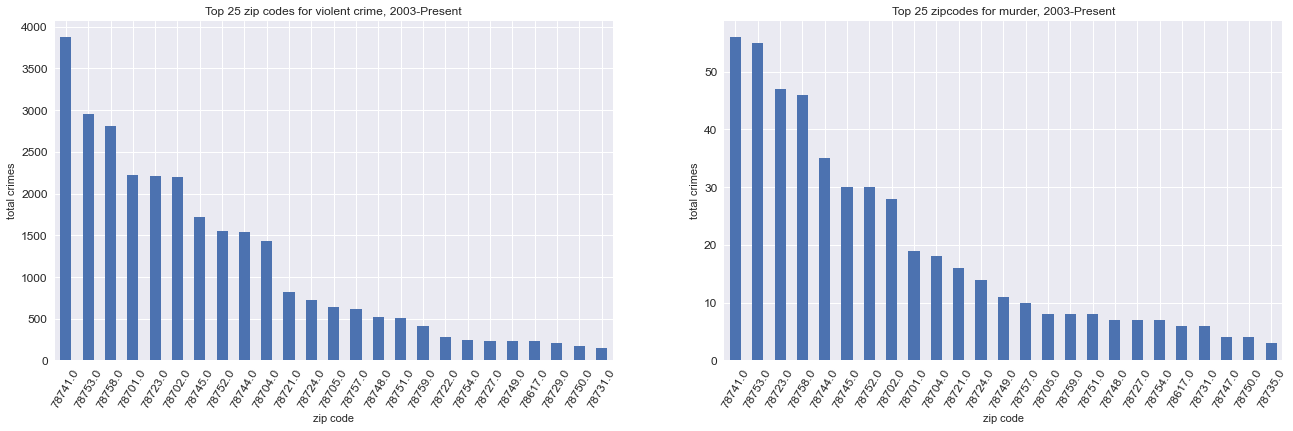

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,1
78613.0,15,11,0,1,7
78617.0,124,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,64,30,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

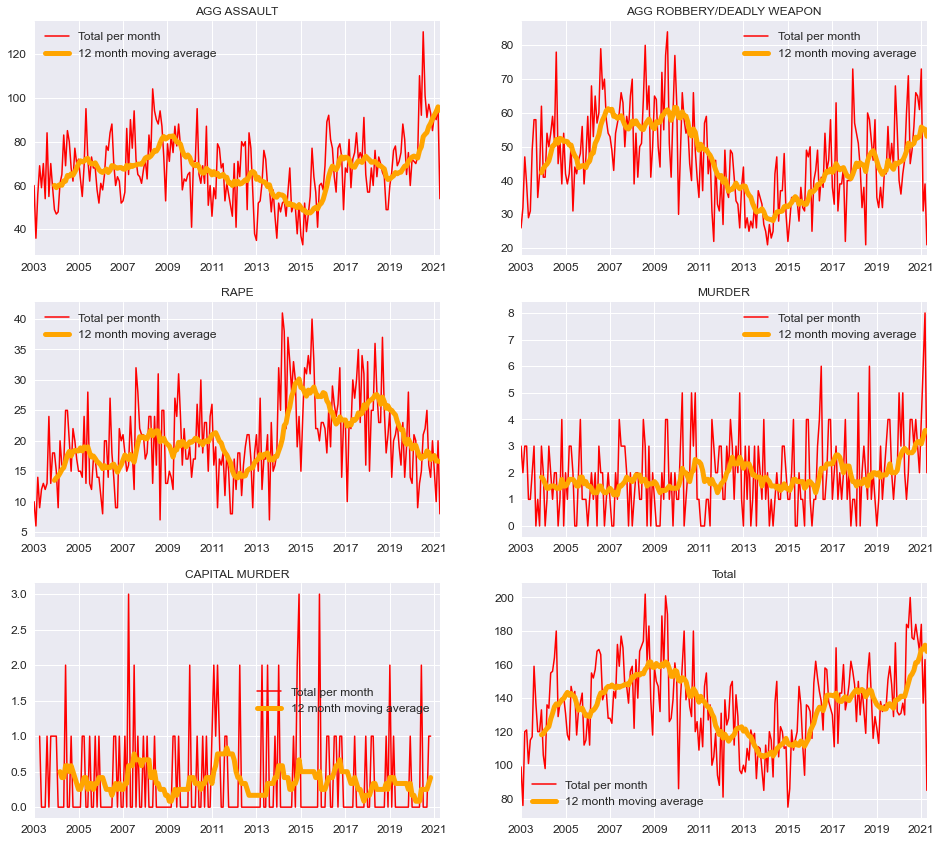

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

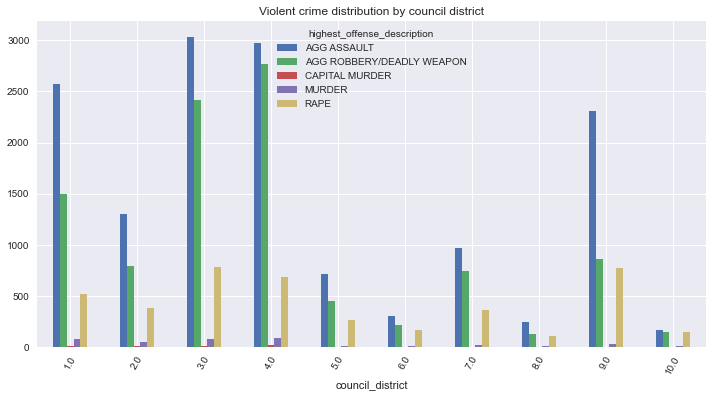

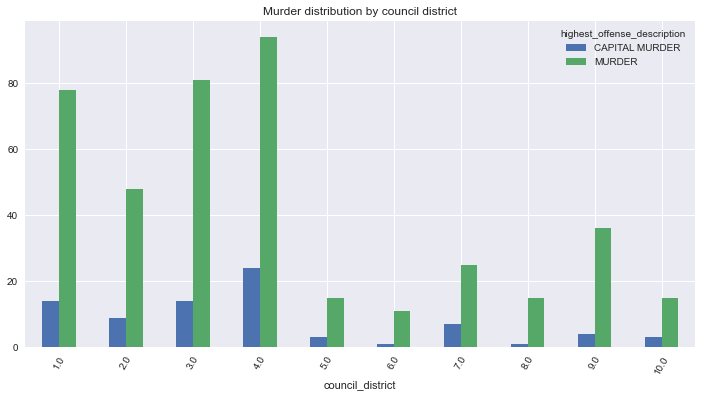

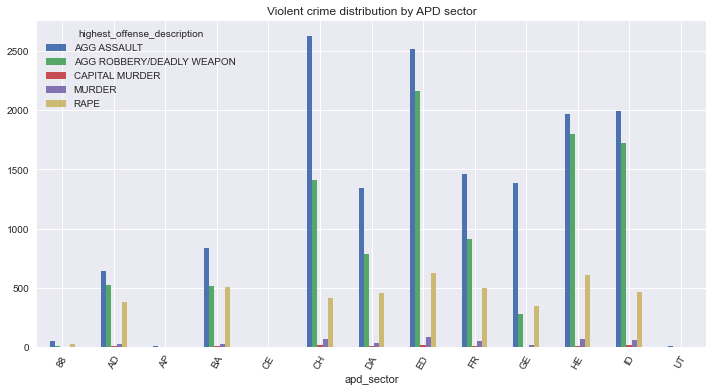

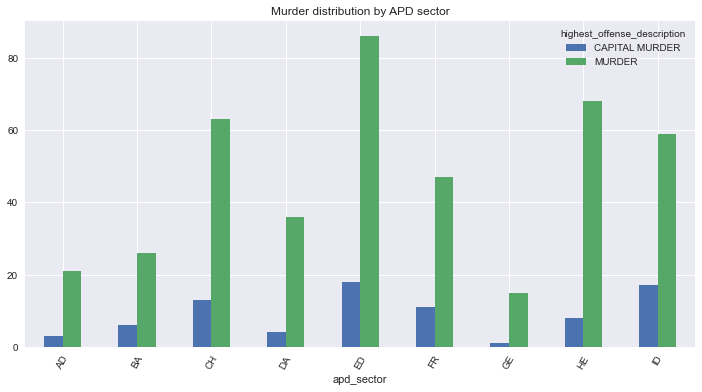

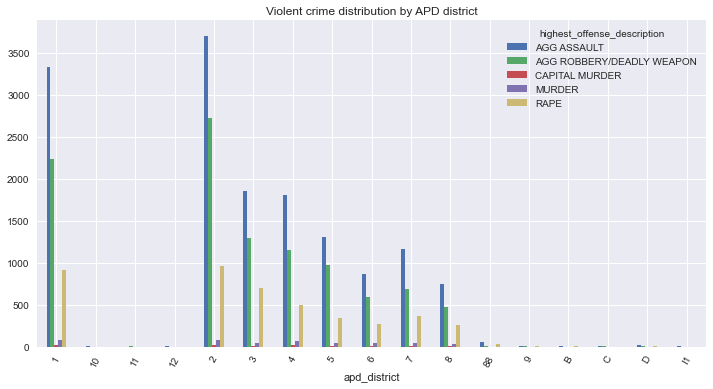

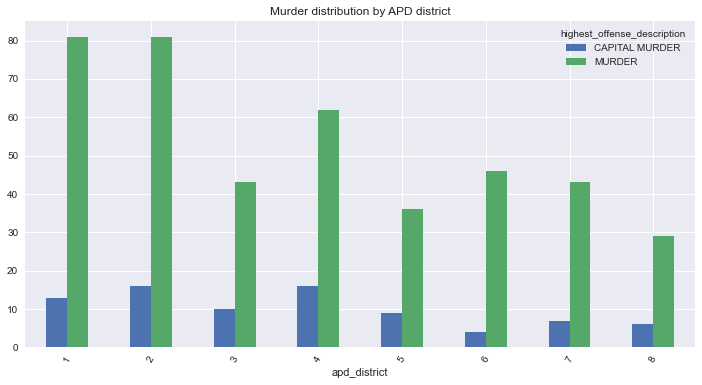

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,14,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,671,46,2,8,79
CAMP / CAMPGROUND,23,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


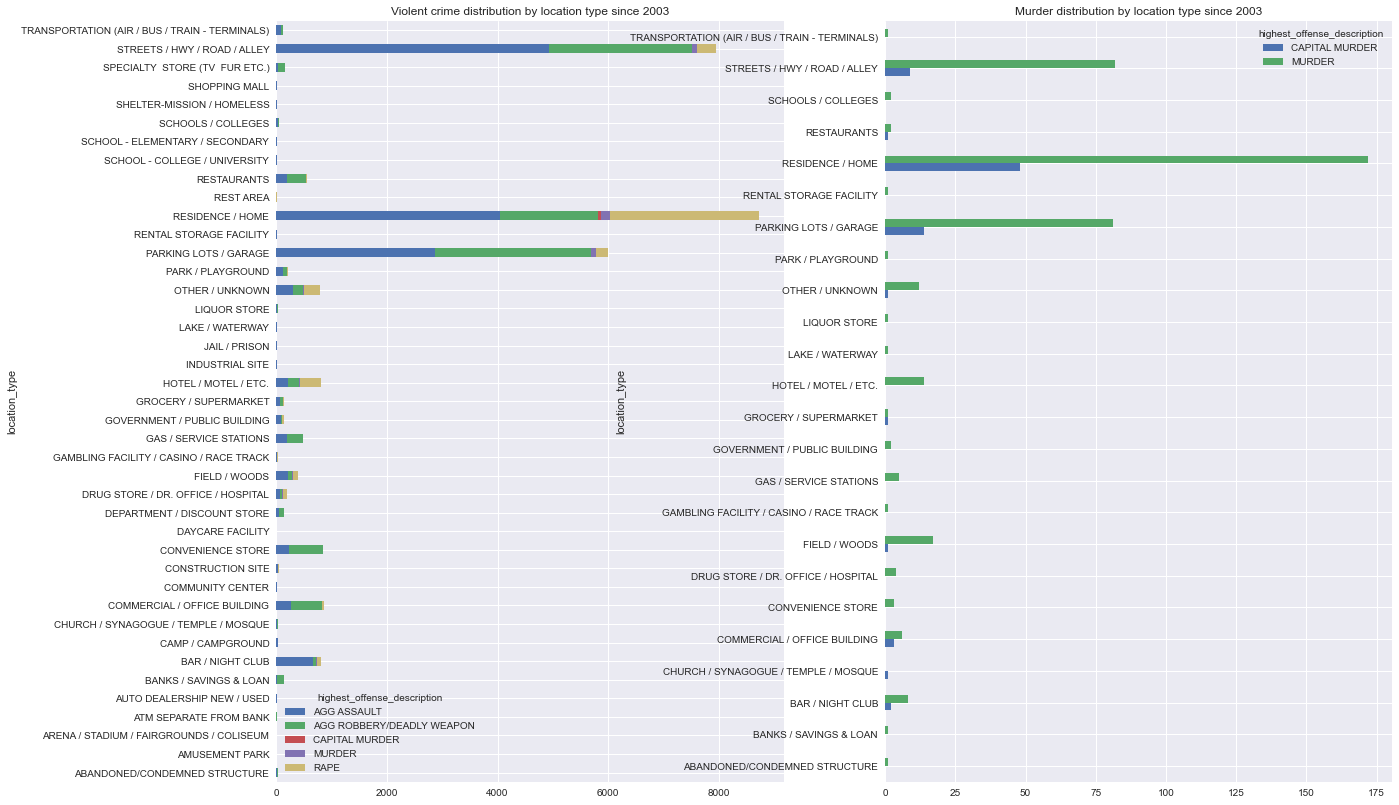

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11597
1030 NORWOOD PARK BLVD             9227
2901 S CAPITAL OF TEXAS HWY NB     8133
3600 PRESIDENTIAL BLVD             7377
500 E 7TH ST                       6121
1000 E 41ST ST                     5830
3708 S 2ND ST                      5257
2508 E RIVERSIDE DR                4837
11200 LAKELINE MALL DR             4509
9300 S IH 35 SVRD SB               4078
715 E 8TH ST                       4007
9414 N LAMAR BLVD                  3874
1137 GUNTER ST                     3207
710 E BEN WHITE BLVD SVRD WB       3203
6001 AIRPORT BLVD                  2922
12900 N IH 35 SVRD SB              2817
5800 TECHNI CENTER DR              2761
2701 E 7TH ST                      2722
5901 AIRPORT BLVD                  2718
6118 FAIRWAY ST                    2677
1300 CROSSING PL                   2641
1515 WICKERSHAM LN                 2454
6409 SPRINGDALE RD                 2441
2400 S CONGRESS AVE                2439
601 E 15TH ST                      2362


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           67
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         56
1071 CLAYTON LN             54
1030 NORWOOD PARK BLVD      53
9200 NORTH PLZ              53
6103 MANOR RD               52
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
Name: address, dtype: int64

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

6409 SPRINGDALE RD           3
4700 E RIVERSIDE DR          3
8800 N IH 35 SVRD SB         3
8610 N LAMAR BLVD            3
6407 SPRINGDALE RD           3
2915 S IH 35 SVRD NB         2
9220 N IH 35 SVRD SB         2
201 W 5TH ST                 2
1050 SPRINGDALE RD           2
2508 E RIVERSIDE DR          2
744 W WILLIAM CANNON DR      2
2501 ANKEN DR                2
833 FAIRFIELD DR             2
7330 BLUFF SPRINGS RD        2
11105 N IH 35 SVRD NB        2
10610 MORADO CIR             2
6600 ED BLUESTEIN BLVD SB    2
601 E 15TH ST                2
7000 DECKER LN               2
10503 N LAMAR BLVD           2
8912 N LAMAR BLVD            2
9010 GALEWOOD DR             2
815 W SLAUGHTER LN           2
2400 WICKERSHAM LN           2
605 MASTERSON PASS           2
1137 GUNTER ST               2
6118 FAIRWAY ST              2
8225 SAM RAYBURN DR          2
9601 MIDDLE FISKVILLE RD     2
1711 RUTLAND DR              2
Name: address, dtype: int64

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")